### Data Drift: Detection Using Statistical Tests
**Question**: Simulate two datasets with a shift in distribution, and apply the Kolmogorov-
Smirnov test to determine if data drift has occurred.

Simulated two datasets with a potential distribution shift.

Summary statistics for Dataset 1:
count    200.000000
mean      -0.040771
std        0.931004
min       -2.619745
25%       -0.705128
50%       -0.004192
75%        0.500852
max        2.720169
dtype: float64

Summary statistics for Dataset 2:
count    200.000000
mean       1.585868
std        0.987004
min       -1.741267
25%        0.894162
50%        1.578839
75%        2.187231
max        5.352731
dtype: float64


/tmp/ipykernel_12817/1245825237.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Dataset')


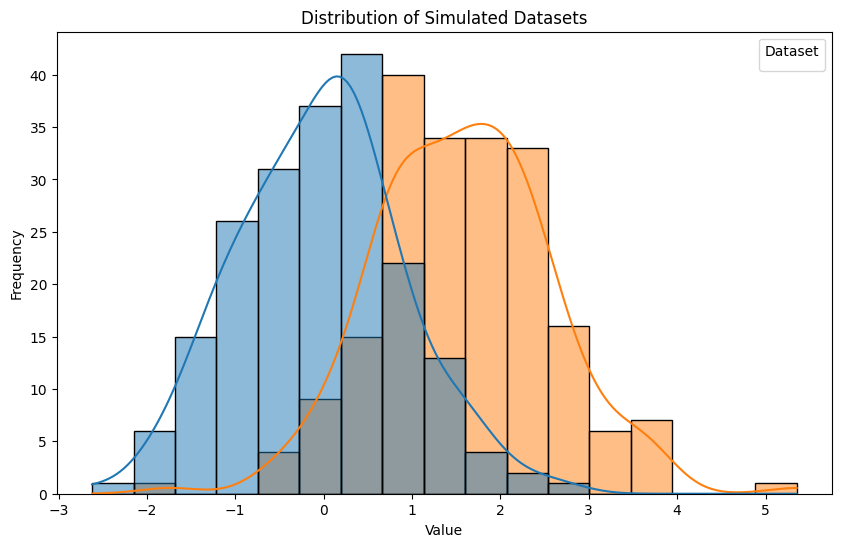

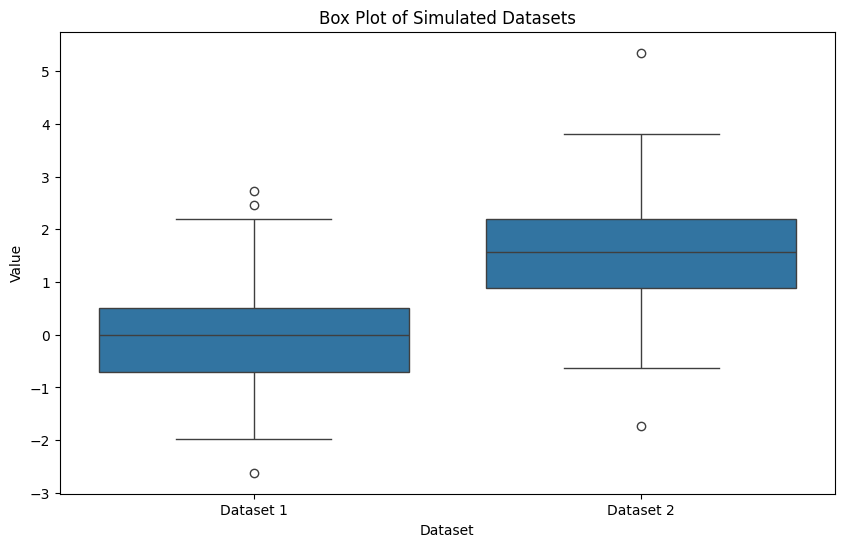


--- Applying the Kolmogorov-Smirnov Test ---
KS Statistic: 0.6500
P-value: 0.0000

Significance level (alpha): 0.05
The p-value is less than the significance level, so we reject the null hypothesis.
This suggests that there is a statistically significant difference between the distributions of the two datasets, indicating data drift.

Kolmogorov-Smirnov test applied to detect data drift.


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns

# --- Simulation Parameters ---
np.random.seed(42)
num_samples = 200
# Distribution 1 parameters
mean1 = 0
std1 = 1
# Distribution 2 parameters (simulating a shift)
mean2 = 1.5
std2 = 1

# --- Step 1: Simulate Two Datasets with a Shift in Distribution ---
data1 = np.random.normal(mean1, std1, num_samples)
data2 = np.random.normal(mean2, std2, num_samples)

df1 = pd.DataFrame({'value': data1, 'dataset': 'Dataset 1'})
df2 = pd.DataFrame({'value': data2, 'dataset': 'Dataset 2'})
combined_df = pd.concat([df1, df2])

print("Simulated two datasets with a potential distribution shift.\n")
print("Summary statistics for Dataset 1:")
print(pd.Series(data1).describe())
print("\nSummary statistics for Dataset 2:")
print(pd.Series(data2).describe())

# --- Step 2: Visualize the Distributions ---
plt.figure(figsize=(10, 6))
sns.histplot(combined_df, x='value', hue='dataset', kde=True)
plt.title('Distribution of Simulated Datasets')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(title='Dataset')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='dataset', y='value', data=combined_df)
plt.title('Box Plot of Simulated Datasets')
plt.xlabel('Dataset')
plt.ylabel('Value')
plt.show()

# --- Step 3: Apply the Kolmogorov-Smirnov Test ---
print("\n--- Applying the Kolmogorov-Smirnov Test ---")

# The Kolmogorov-Smirnov (KS) test is a non-parametric test that compares the
# cumulative distribution functions (CDFs) of two independent samples.
# The null hypothesis is that the two samples are drawn from the same distribution.
# A small p-value (typically < 0.05) suggests that we reject the null hypothesis
# and conclude that the distributions are significantly different, indicating data drift.

ks_statistic, p_value = kstest(data1, data2)

print(f"KS Statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
print(f"\nSignificance level (alpha): {alpha}")
if p_value < alpha:
    print("The p-value is less than the significance level, so we reject the null hypothesis.")
    print("This suggests that there is a statistically significant difference between the distributions of the two datasets, indicating data drift.")
else:
    print("The p-value is not less than the significance level, so we fail to reject the null hypothesis.")
    print("This suggests that there is no statistically significant difference between the distributions of the two datasets, and we cannot conclude that data drift has occurred based on this test.")

print("\nKolmogorov-Smirnov test applied to detect data drift.")